## Credit Card Frad Detection

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

[https://www.kaggle.com/mlg-ulb/creditcardfraud]

In [1]:
# import packages

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
# import cc data from data dir

df = pd.read_csv('../data/creditcard.csv')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


## Data exploration

In [3]:
n_samples, n_features = df.values.shape[0], df.values.shape[1] -1
n_regular_transactions = df['Class'].value_counts()[0]
n_frauds = df['Class'].value_counts()[1]
null_values = df.isnull().sum().sum()


s= '''
The dataset includes {0} samples and {1} features.
The target is represented by the 'Class' of the transaction, which can either be 'fraud' (1) or 'no fraud' (0).
Frauds are {2}, which means the {3:.2%} of the samples.
Regular transactions are {4}, which means the {5:.2%} of the samples.
There are {6} missing values and {7} null values.
'''.format(n_samples, n_features, n_frauds, n_frauds/n_samples,
    n_regular_transactions, n_regular_transactions/n_samples, missing_values, null_values)

print(s)



The dataset includes 284807 samples and 31 features.
The target is represented by the 'Class' of the transaction, which can either be 'fraud' (1) or 'no fraud' (0).
Frauds are 492, which means the 0.17% of the samples.
Regular transactions are 284315, which means the 99.83% of the samples.
There are 0 missing values and 0 null values.



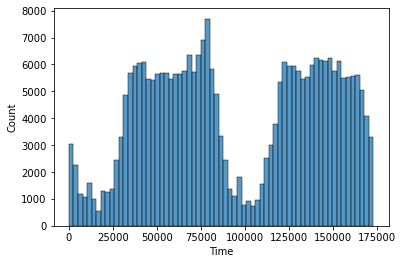

In [4]:
sns.histplot(df['Time'])

plt.show()

In [5]:
# transform 'Time' in 'Hour of the day', than drop 'Time'
df['Hour'] = df['Time'].apply(lambda x: int(np.ceil(float(x)/3600) % 24))
df.drop('Time', axis=1, inplace=True)
df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1


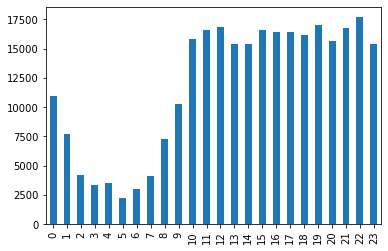

In [6]:
df['Hour'].value_counts().reindex(list(range(24))).plot.bar()
plt.show()

The dataset is highly unbalanced, since the 'non frauds' outnumber the 'frauds'


Text(0.5, 1.0, 'NO FRAUDS vs FRAUDS')

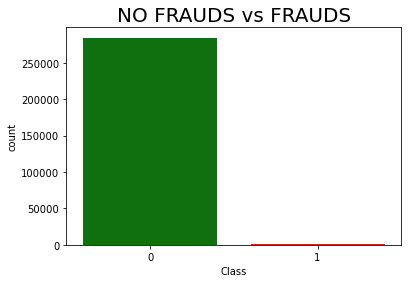

In [25]:
print("The dataset is highly unbalanced, since the 'non frauds' outnumber the 'frauds'")

colors = ["green", "red"]
sns.countplot(x = 'Class', data=df, palette=colors)
plt.title('NO FRAUDS vs FRAUDS', size=20)

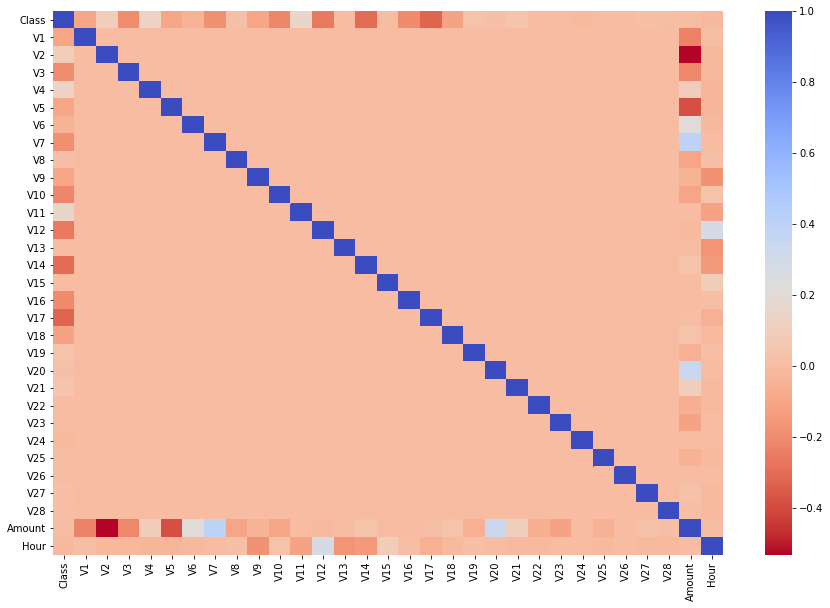

In [46]:
new_oreder_list = list(df.columns)
new_oreder_list.remove("Class")
new_oreder_list = ["Class"] + new_oreder_list

corr = df[new_oreder_list].corr()
plt.figure(figsize=(15, 10)) 
sns.heatmap(corr, cmap='coolwarm_r')

plt.show()

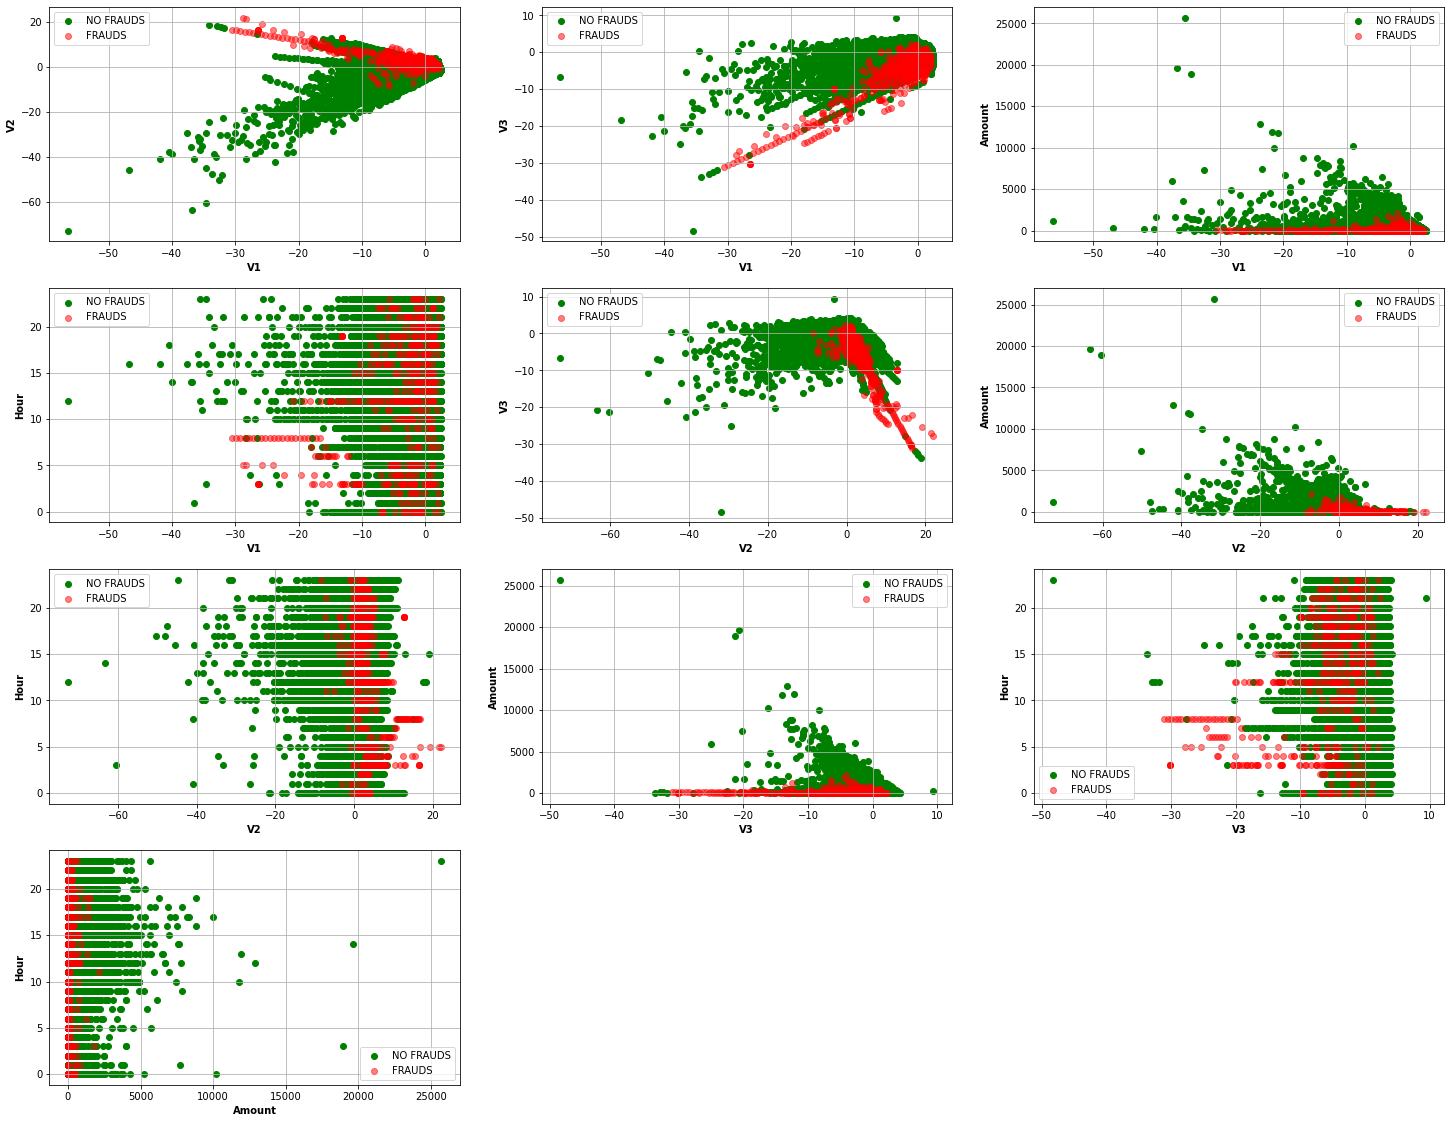

In [52]:
plt.figure(figsize=(25, 25))  
for idx, feat in enumerate(list(combinations(['V1','V2','V3','Amount','Hour'],2))):
  plt.subplot(5, 3 , idx + 1)
  plt.scatter(df[df['Class']==0][feat[0]], df[df['Class']==0][feat[1]],
  marker='o', color='green', alpha=1, label='NO FRAUDS')
  plt.scatter(df[df['Class']==1][feat[0]], df[df['Class']==1][feat[1]],
  marker='o', color='red', alpha=0.5, label='FRAUDS')
  plt.xlabel(feat[0], fontweight='bold')
  plt.ylabel(feat[1], fontweight='bold')
  plt.grid(True)
  plt.legend()
plt.show()

## Descriptive Plots 

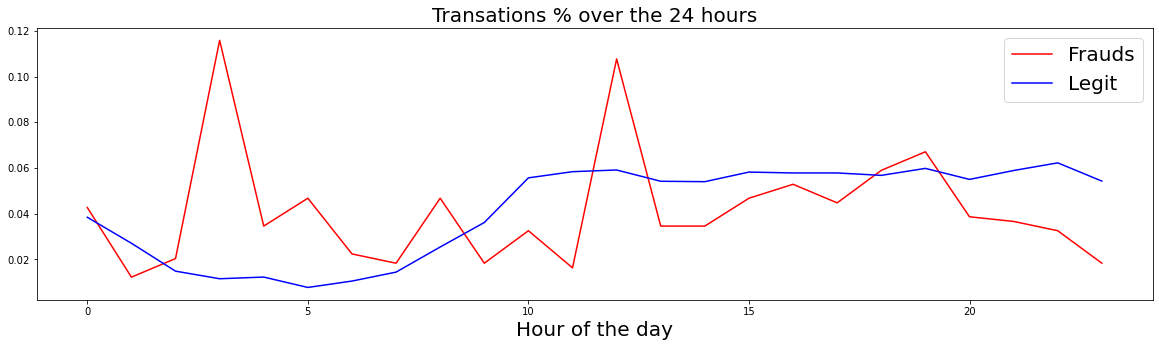

In [53]:
# create pivot table for creating the plot
t_over_time = df.pivot_table(values='Amount',index='Hour',columns='Class',aggfunc='count')
# create rel columns
t_over_time['fraud_perc'] =  t_over_time[1]/t_over_time[1].sum()
t_over_time['norm_perc'] =  t_over_time[0]/t_over_time[0].sum()
# del abs columns
t_over_time.drop(0, axis=1, inplace=True)
t_over_time.drop(1, axis=1, inplace=True)

# plot
plt.figure(figsize=(20,5))
plt.title('Transations % over the 24 hours',fontsize=20)
plt.plot(t_over_time.index, t_over_time.fraud_perc, c = 'r', label = 'Frauds')
plt.plot(t_over_time.index, t_over_time.norm_perc, c = 'b', label = 'Legit')
plt.xlabel('Hour of the day',fontsize=20)
plt.legend(fontsize=20)

C:\Users\Max\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Class', ylabel='Amount'>

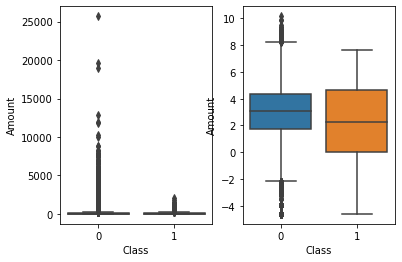

In [57]:
plt.subplot(1,2,1)
sns.boxplot(x="Class", y="Amount", data=df)
plt.subplot(1,2,2)
sns.boxplot(x=df["Class"], y=np.log(df["Amount"]))

<AxesSubplot:xlabel='Class', ylabel='V3'>

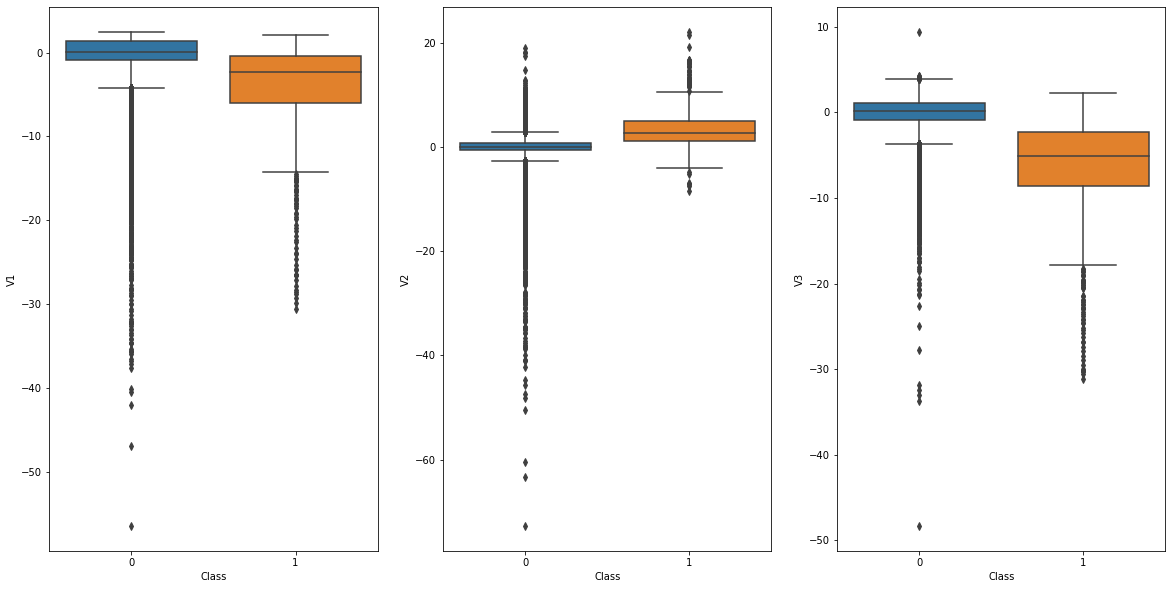

In [11]:
plt.figure(figsize=(20, 10))  
plt.subplot(1,3,1)
sns.boxplot(x="Class", y="V1", data=df)
plt.subplot(1,3,2)
sns.boxplot(x="Class", y="V2", data=df)
plt.subplot(1,3,3)
sns.boxplot(x="Class", y="V3", data=df)